## Importing Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Loading Highway Image

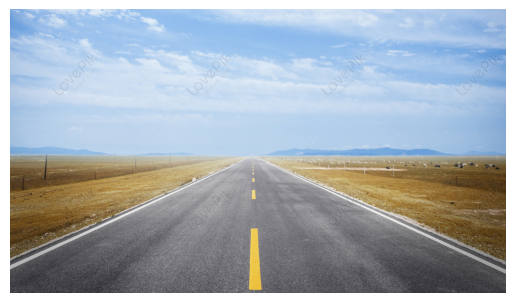

In [16]:
highway = cv.imread('highway_1.jpg')
highway_copy = highway.copy()
highway_copy = cv.cvtColor(highway_copy, cv.COLOR_BGR2RGB)
plt.imshow(highway_copy)
plt.axis('off')
plt.show()

## Image PreProcessing

### Converting into Grayscale

We convert the image to grayscale so that we can detect the edges easily using canny edge detection 

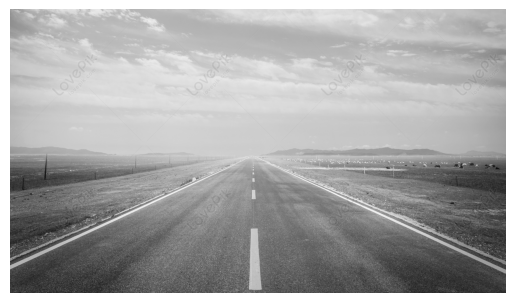

In [17]:
highway_grayscaled = cv.cvtColor(highway, cv.COLOR_BGR2GRAY)
plt.imshow(highway_grayscaled, cmap='gray')
plt.axis('off')
plt.show()

### Blurring the image 

We blur the image to remove noise. 

We are viewing the results of two different approaches : 

1. __Gaussian Blurring__ : It takes each pixel and replace it with a weighted average of its neighbours. It is very effective in removing random noise. 

2. __Bilateral_gaussian__ : It performs Gaussian blurring while preserving edges by considering both spatial distance and color difference. It is useful when we need sharp edgees but it is computationally expensive 


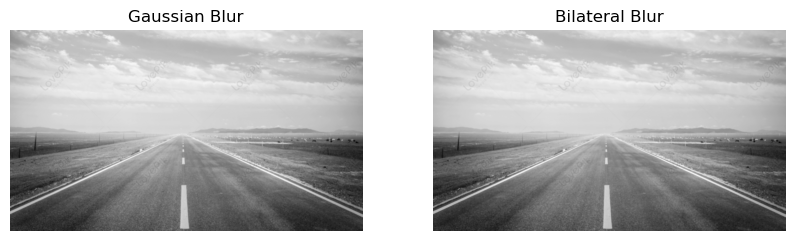

In [18]:
blur_gaussian = cv.GaussianBlur(highway_grayscaled, (5, 5), 0)
blur_bilateral = cv.bilateralFilter(highway_grayscaled, 5, 75, 75)
fig,axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(blur_gaussian, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Gaussian Blur')
axs[1].imshow(blur_bilateral, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Bilateral Blur')
plt.show()

## Edge Detection 

I have used Canny Edge Detection Technique for detecting the edges as it detects only strong edges and ignores the weak ones, preventing false detections. It is also able to find thin, continuous edges. 

Canny is a multi - step edge detection algorithm that includes : 
1. __Gaussian Blurring__ - Removes noise. 

2. __Gradient Computation__ - Uses Sobel filters to find gradients in X and Y 

3. __Non-Maximum Suppression__ - Removes weak edges to get sharp ones. 

4. __Hysteresis Thresholding__ - Uses two thresholds(low and high) to keep strong edges and remove noise. 

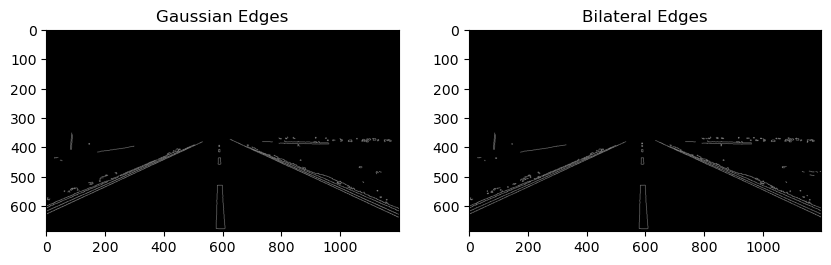

In [22]:
gaussian_edges = cv.Canny(blur_gaussian, 100, 200)
bilateral_edges = cv.Canny(blur_bilateral, 100, 200)
fig,axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(gaussian_edges, cmap='gray')

axs[0].set_title('Gaussian Edges')
axs[1].imshow(bilateral_edges, cmap='gray')

axs[1].set_title('Bilateral Edges')
plt.show()

In [21]:
h, w = highway.shape[:2]
h, w

(686, 1200)

## Creating a Mask

Done this and the following steps two times, once for gaussian and the next time for bilateral.

The need to create a mask is to remove the unnecessary things from the image such as the clouds the ground and focus on the road as it is the only part we will further process with.

First I decided the polygon which i want to create ti fit into the road. I hit and trial a few times and found the approxiamate coordinates which fits the road well. Then using fillPoly() i made a mask of the coordinates i decided. 

Then i perfomed bitwise operation 'AND' on the edge detected image and the mask so that i can get the parts which is common in both and ended up in getting the desired portion of the image which is the road. 

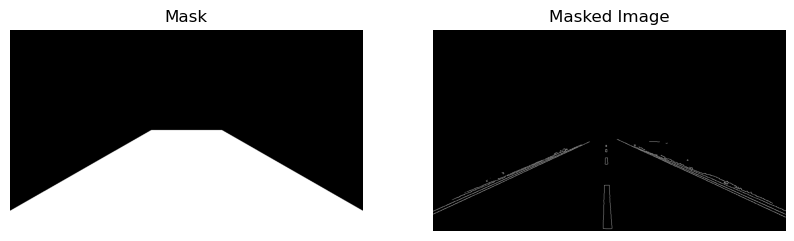

In [ ]:
polygon = np.array([[
        (0,h),
        (w,h),
        (w,0.9*h),
        (0.6*w,0.5*h),
        (0.4*w,0.5*h),
        (0,0.9*h), 
    ]], dtype=np.int32)

mask = np.zeros((h, w), np.uint8)
cv.fillPoly(mask, polygon, 255)
masked_img = cv.bitwise_and(gaussian_edges, mask)
fig,axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(mask, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Mask')
axs[1].imshow(masked_img, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Masked Image')
plt.show()

## Detecting The Lanes : 

I Used Probabilistic Hough Transform to detect the lanes in the images as it is a techniques used to detect lines in an image. Since Lane Markings are straight lines in most cases so HoughTransform is best in this case. 

In [61]:
lines = cv.HoughLinesP(masked_img, rho=1, theta=np.pi/180, threshold=35, minLineLength=5, maxLineGap=50)

In [51]:
lines

array([[[ 683,  398, 1127,  596]],

       [[   1,  628,  442,  423]],

       [[   0,  618,  440,  422]],

       [[  63,  600,  532,  382]],

       [[ 724,  414, 1187,  611]],

       [[ 748,  430, 1195,  638]],

       [[  78,  573,  411,  431]],

       [[1042,  559, 1199,  629]],

       [[ 140,  543,  456,  409]],

       [[ 221,  519,  503,  393]],

       [[ 836,  470, 1198,  638]],

       [[ 774,  429,  919,  490]],

       [[ 718,  410,  916,  490]],

       [[ 578,  677,  583,  530]],

       [[ 598,  530,  608,  677]],

       [[1032,  536, 1154,  591]],

       [[ 625,  374,  824,  466]],

       [[  64,  580,  325,  469]],

       [[ 977,  522, 1199,  617]],

       [[ 578,  664,  582,  531]],

       [[ 629,  376,  642,  381]],

       [[ 991,  520, 1100,  568]],

       [[ 952,  498, 1082,  556]],

       [[ 938,  494, 1145,  586]],

       [[ 116,  552,  457,  408]],

       [[ 788,  436,  933,  494]],

       [[ 442,  417,  450,  413]],

       [[ 924,  490, 1013,  

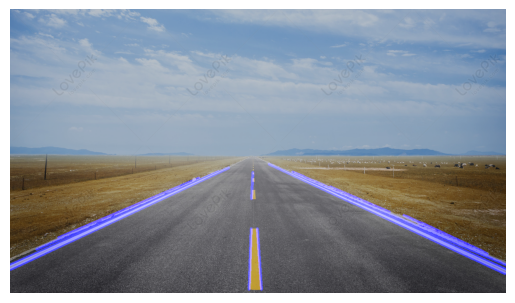

In [62]:
line_img = np.zeros_like(highway)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 5)

highway_with_lines = cv.addWeighted(highway, 0.8, line_img, 1, 1)
highway_with_lines = cv.cvtColor(highway_with_lines, cv.COLOR_BGR2RGB)
plt.imshow(highway_with_lines)
plt.axis('off')
plt.show()

For Bilateral : 

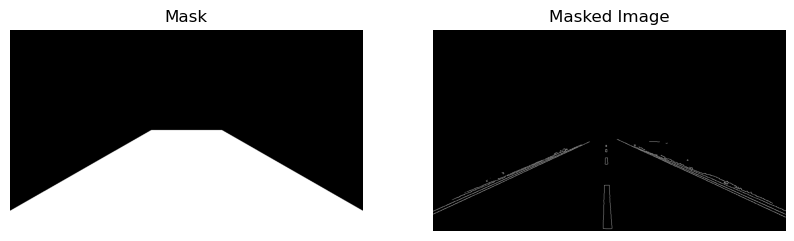

In [ ]:
import numpy as np
polygon = np.array([[
        (0,h),
        (w,h),
        (w,0.9*h),
        (0.6*w,0.5*h),
        (0.4*w,0.5*h),
        (0,0.9*h), 
    ]], dtype=np.int32)

mask = np.zeros((h, w), np.uint8)
cv.fillPoly(mask, polygon, 255)
masked_img = cv.bitwise_and(gaussian_edges, mask)
fig,axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(mask, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Mask')
axs[1].imshow(masked_img, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Masked Image')
plt.show()

In [64]:
lines = cv.HoughLinesP(masked_img, rho=1, theta=np.pi/180, threshold=35, minLineLength=5, maxLineGap=50)

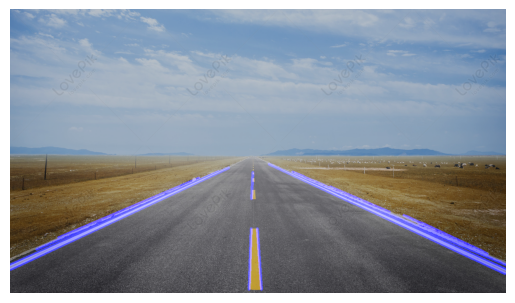

In [65]:
line_img = np.zeros_like(highway)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 5)

highway_with_lines = cv.addWeighted(highway, 0.8, line_img, 1, 1)
highway_with_lines = cv.cvtColor(highway_with_lines, cv.COLOR_BGR2RGB)
plt.imshow(highway_with_lines)
plt.axis('off')
plt.show()

Since i can see that some black portion are also present in the lines detected by the hough LineTransfom

Applying threshold on the canny edge detected image and trying again for better output : 

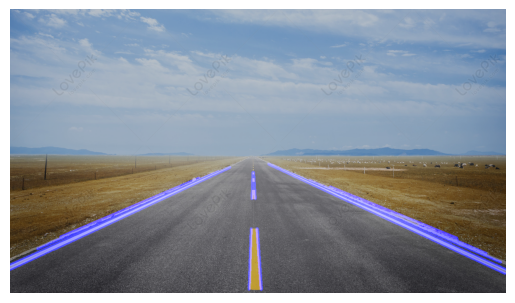

In [72]:
_, enhanced_edges = cv.threshold(masked_img, 100, 255, cv.THRESH_BINARY)
lines = cv.HoughLinesP(enhanced_edges, rho=1, theta=np.pi/180, threshold=40, minLineLength=5, maxLineGap=50)
line_img = np.zeros_like(highway)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 5)

highway_with_lines = cv.addWeighted(highway, 0.8, line_img, 1, 1)
highway_with_lines = cv.cvtColor(highway_with_lines, cv.COLOR_BGR2RGB)
plt.imshow(highway_with_lines)
plt.axis('off')
plt.show()

Trying a different polygon : 

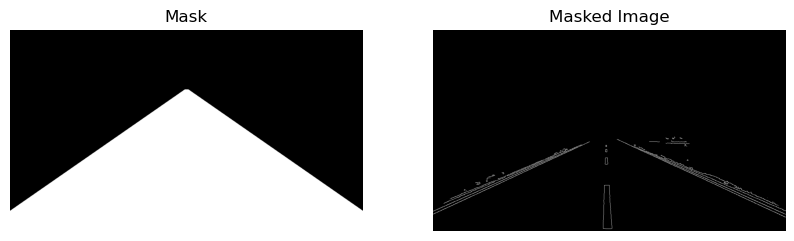

In [ ]:
import numpy as np
polygon = np.array([[
        (0,h),
        (w,h),
        (w,0.9*h),
        (0.505*w,0.3*h),
        (0.495*w,0.3*h),
        (0,0.9*h), 
    ]], dtype=np.int32)

mask = np.zeros((h, w), np.uint8)
cv.fillPoly(mask, polygon, 255)
masked_img = cv.bitwise_and(gaussian_edges, mask)
fig,axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(mask, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Mask')
axs[1].imshow(masked_img, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Masked Image')
plt.show()

no major change, discarded ...

## Binary Masks : 

Converting the image into HSV(Hue, Saturation, Value) color space because it seperates color(hue) from intensity (brightness), making it more robust to lighting variations. Hue(H) is independent of brightness -> Color detection is stable under different lighting

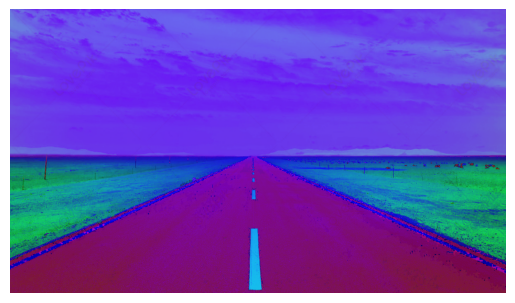

In [80]:
hsv = cv.cvtColor(highway, cv.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.axis('off')
plt.show()

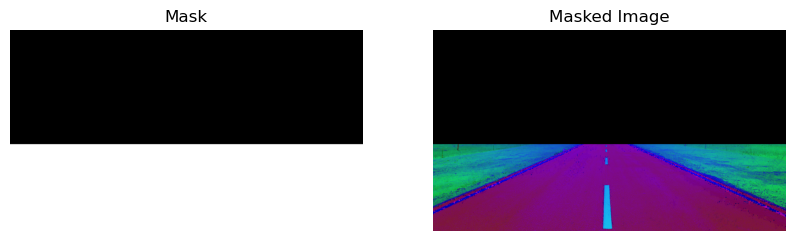

In [106]:
import numpy as np
polygon = np.array([[
        (0,h),
        (w,h),
        (w,0.57*h),
        (0,0.57*h)
    ]], dtype=np.int32)

mask = np.zeros((h,w), np.uint8)
cv.fillPoly(mask, [polygon], 255)
masked_img = cv.bitwise_and(hsv, hsv, mask=mask)
fig,axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(mask, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Mask')
axs[1].imshow(masked_img, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Masked Image')
plt.show()

Created a mask of white color to isolate it from others. The different range limits of different colors in hue. So I created the range for white color and masked it and performed bitwise operation with the masked_image obtained form above ( I masked the image as I was also getting clouds so i decided to consider only the bottom path). SImilarly for the yellow path...

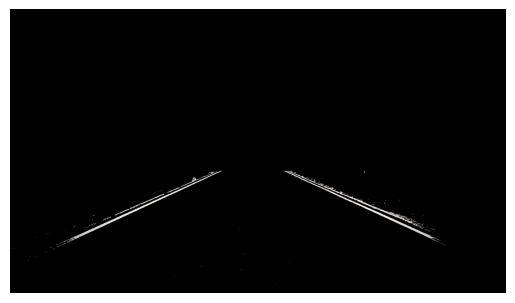

In [107]:

lower_white = np.array([0, 0, 200], dtype=np.uint8)
upper_white = np.array([180, 30, 255], dtype=np.uint8)
mask_white = cv.inRange(masked_img, lower_white, upper_white)
white = cv.bitwise_and(highway, highway, mask=mask_white)
white = cv.cvtColor(white, cv.COLOR_BGR2RGB)
plt.imshow(white)
plt.axis('off')
plt.show()

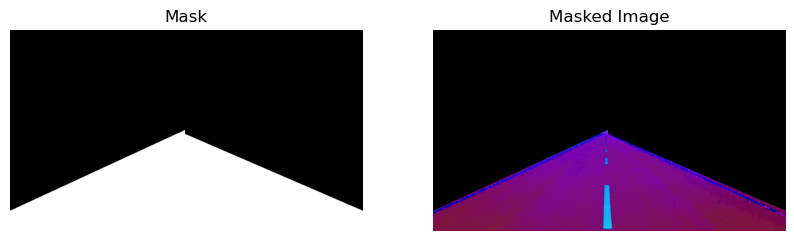

In [123]:
import numpy as np
polygon = np.array([[
        (0,h),
        (w,h),
        (w,0.9*h),
        (0.495*w,0.52*h),
        (0.495*w,0.5*h),
        (0,0.9*h), 
    ]], dtype=np.int32)

mask = np.zeros((h,w), np.uint8)
cv.fillPoly(mask, [polygon], 255)
masked_img = cv.bitwise_and(hsv, hsv, mask=mask)
fig,axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(mask, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Mask')
axs[1].imshow(masked_img, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Masked Image')
plt.show()

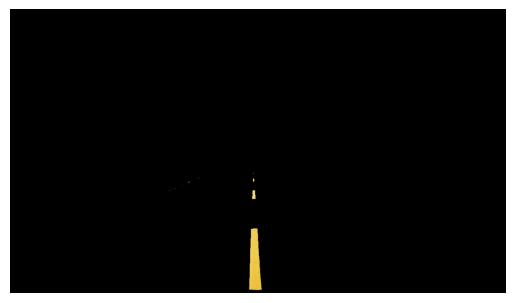

In [124]:
lower_yellow = np.array([15, 100, 100], dtype=np.uint8)
upper_yellow = np.array([35, 255, 255], dtype=np.uint8)
mask_yellow = cv.inRange(masked_img, lower_yellow, upper_yellow)
yellow = cv.bitwise_and(highway, highway, mask=mask_yellow)
yellow = cv.cvtColor(yellow, cv.COLOR_BGR2RGB)
plt.imshow(yellow)
plt.axis('off')
plt.show()